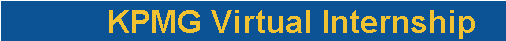

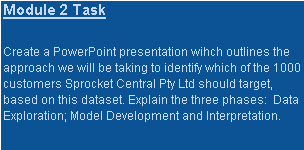

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## **Reading excel file**

In [4]:
df = pd.ExcelFile("KPMG_VI_New_raw_data_update_final (1).xlsx")

## **Reading file inside excel file separately**

In [5]:
transaction = pd.read_excel(df, "Transactions")

new_customer = pd.read_excel(df,"NewCustomerList")

customer_demographic = pd.read_excel(df,"CustomerDemographic")

customer_address = pd.read_excel(df,"CustomerAddress")

<ipython-input-5-450bac97d697>:3: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype=datetime64[ns])
  new_customer = pd.read_excel(df,"NewCustomerList")
<ipython-input-5-450bac97d697>:5: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype=datetime64[ns])
  customer_demographic = pd.read_excel(df,"CustomerDemographic")


# **Exploring New customer dataset**

In [6]:
new_customer.shape

(1000, 23)

In [7]:
new_customer.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,state,country,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,...,QLD,Australia,6,0.95,1.1875,1.484375,1.261719,1,1,1.718750
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,...,NSW,Australia,11,0.55,0.5500,0.687500,0.584375,1,1,1.718750
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,...,VIC,Australia,5,1.05,1.0500,1.050000,1.050000,1,1,1.718750
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,...,QLD,Australia,1,0.90,1.1250,1.125000,1.125000,4,4,1.703125
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,...,NSW,Australia,9,0.97,0.9700,1.212500,1.212500,4,4,1.703125


### **There are unnamed columns which are not necessary so removing**

In [8]:
new_customer.drop(["Unnamed: 16" , "Unnamed: 17" , "Unnamed: 18" , "Unnamed: 19","Unnamed: 20"],axis = 1 , inplace = True)


In [9]:
new_customer

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,14,45 Shopko Center,4500,QLD,Australia,6,1,1.718750
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,16,14 Mccormick Park,2113,NSW,Australia,11,1,1.718750
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,10,5 Colorado Crossing,3505,VIC,Australia,5,1,1.718750
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,5,207 Annamark Plaza,4814,QLD,Australia,1,4,1.703125
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,19,115 Montana Place,2093,NSW,Australia,9,4,1.703125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Ferdinand,Romanetti,Male,60,1959-10-07,Paralegal,Financial Services,Affluent Customer,N,No,9,2 Sloan Way,2200,NSW,Australia,7,996,0.374000
996,Burk,Wortley,Male,22,2001-10-17,Senior Sales Associate,Health,Mass Customer,N,No,6,04 Union Crossing,2196,NSW,Australia,10,997,0.357000
997,Melloney,Temby,Female,17,1954-10-05,Budget/Accounting Analyst IV,Financial Services,Affluent Customer,N,Yes,15,33475 Fair Oaks Junction,4702,QLD,Australia,2,997,0.357000
998,Dickie,Cubbini,Male,30,1952-12-17,Financial Advisor,Financial Services,Mass Customer,N,Yes,19,57666 Victoria Way,4215,QLD,Australia,2,997,0.357000


In [10]:
new_customer.isnull().sum()

first_name                               0
last_name                               29
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     17
job_title                              106
job_industry_category                  165
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                   0
address                                  0
postcode                                 0
state                                    0
country                                  0
property_valuation                       0
Rank                                     0
Value                                    0
dtype: int64

## **creating age columns from date**

In [11]:
from datetime import datetime
new_customer["DOB"] = pd.to_datetime(new_customer["DOB"])

current_date = datetime.now()

new_customer["age"] = (current_date - new_customer["DOB"]).astype("<m8[Y]")

In [12]:
new_customer["age"]

0      66.0
1      53.0
2      49.0
3      44.0
4      58.0
       ... 
995    64.0
996    21.0
997    69.0
998    70.0
999    68.0
Name: age, Length: 1000, dtype: float64

## **Creating age group**

In [13]:
age_bins = [0 , 21 , 31 ,41, 51 , 61 , 71 , 81 , 91, float("inf")]

age_labels = ["0-20","21-30","31-40","41-50" , "51-60" , "61-70" , "71-80", "81-90","91+"]

In [14]:
new_customer["Age_group"] = pd.cut(new_customer["age"], bins = age_bins , labels = age_labels)

In [15]:
new_customer["Age_group"]

0      61-70
1      51-60
2      41-50
3      41-50
4      51-60
       ...  
995    61-70
996     0-20
997    61-70
998    61-70
999    61-70
Name: Age_group, Length: 1000, dtype: category
Categories (9, object): ['0-20' < '21-30' < '31-40' < '41-50' ... '61-70' < '71-80' < '81-90' < '91+']

In [16]:
new_customer.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value,age,Age_group
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,14,45 Shopko Center,4500,QLD,Australia,6,1,1.718750,66.0,61-70
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,16,14 Mccormick Park,2113,NSW,Australia,11,1,1.718750,53.0,51-60
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,10,5 Colorado Crossing,3505,VIC,Australia,5,1,1.718750,49.0,41-50
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,5,207 Annamark Plaza,4814,QLD,Australia,1,4,1.703125,44.0,41-50
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,19,115 Montana Place,2093,NSW,Australia,9,4,1.703125,58.0,51-60


## **Count of age Group**

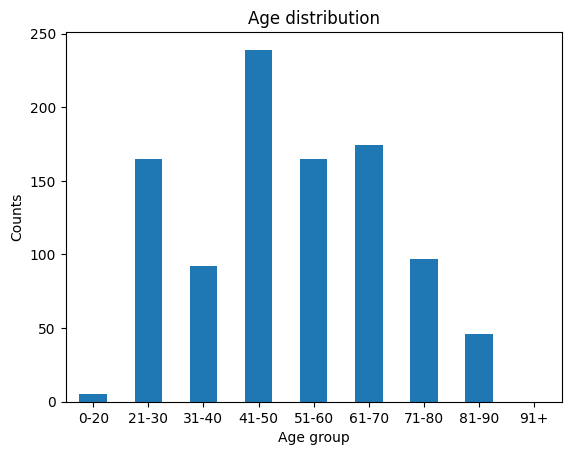

In [17]:
count = new_customer["Age_group"].value_counts().sort_index()


count.plot(kind = "bar" , xlabel = "Age group" , ylabel = "Counts" , title = "Age distribution")
plt.xticks(rotation = 0)
plt.show()

**By this 61+ age has highest count that means new customer are from 61+ , Followed by 42-51**

# **Age group and purchased biked distribution**

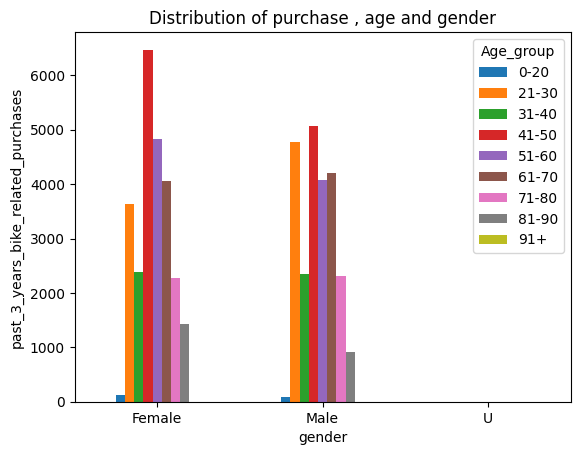

In [18]:
a = new_customer.groupby(["gender","Age_group"])["past_3_years_bike_related_purchases"].sum().sort_index().unstack()
a.plot(kind='bar')
plt.ylabel("past_3_years_bike_related_purchases")
plt.title("Distribution of purchase , age and gender")
plt.xticks(rotation = 0)
plt.show()

# **Finding job industry**

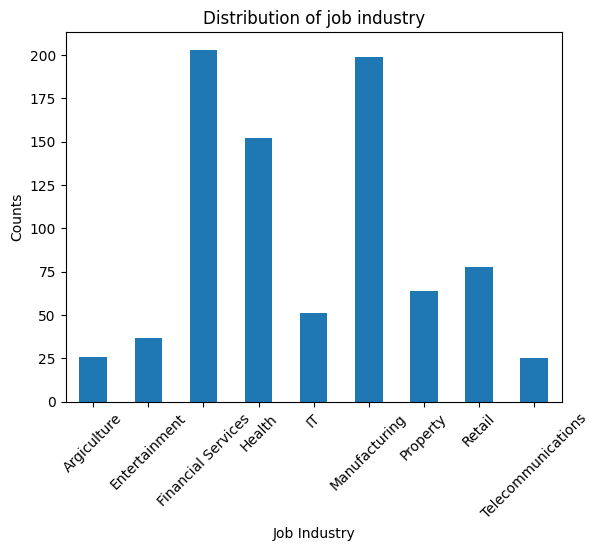

In [19]:
count = new_customer["job_industry_category"].value_counts().sort_index()

count.plot(kind="bar" , xlabel = "Job Industry",ylabel = "Counts" , title = "Distribution of job industry")
plt.xticks(rotation = 45)
plt.show()

# **Distribution of job industry and purchase bike**

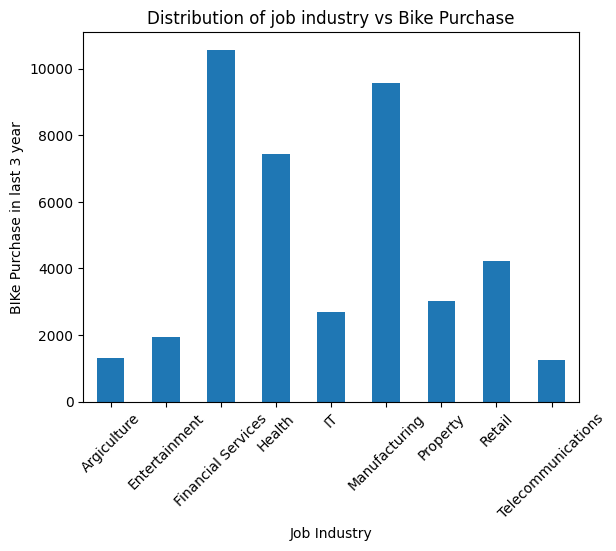

In [20]:
a = new_customer.groupby("job_industry_category")["past_3_years_bike_related_purchases"].sum()

a.plot(kind = "bar" , xlabel = "Job Industry",ylabel = "BIKe Purchase in last 3 year" , title = "Distribution of job industry vs Bike Purchase")
plt.xticks(rotation =45)
plt.show()

# **Finding which state have less number of car**

In [21]:
new_customer.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value,age,Age_group
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,14,45 Shopko Center,4500,QLD,Australia,6,1,1.718750,66.0,61-70
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,16,14 Mccormick Park,2113,NSW,Australia,11,1,1.718750,53.0,51-60
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,10,5 Colorado Crossing,3505,VIC,Australia,5,1,1.718750,49.0,41-50
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,5,207 Annamark Plaza,4814,QLD,Australia,1,4,1.703125,44.0,41-50
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,19,115 Montana Place,2093,NSW,Australia,9,4,1.703125,58.0,51-60


In [22]:
new_customer["state"].unique()

array(['QLD', 'NSW', 'VIC'], dtype=object)

In [23]:
new_customer["owns_car"].unique()

array(['Yes', 'No'], dtype=object)

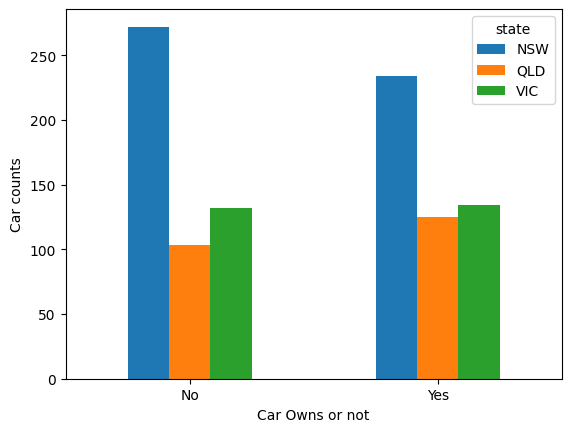

In [24]:
car_count = new_customer.groupby(["owns_car","state"]).size().unstack()

car_count.plot(kind = "bar"  )
plt.xlabel("Car Owns or not")
plt.ylabel("Car counts")
plt.xticks(rotation = 0)
plt.show()

In [25]:
new_customer.columns

Index(['first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'owns_car', 'tenure', 'address', 'postcode', 'state', 'country',
       'property_valuation', 'Rank', 'Value', 'age', 'Age_group'],
      dtype='object')

In [37]:
a = new_customer[(new_customer["past_3_years_bike_related_purchases"] >95)]

a[["gender",'age',"past_3_years_bike_related_purchases","job_industry_category",'owns_car','state']]

,gender,age,past_3_years_bike_related_purchases,job_industry_category,owns_car,state
53,Female,41.0,97,Property,No,NSW
75,Male,49.0,98,Manufacturing,Yes,NSW
163,Male,72.0,96,NaN,Yes,QLD
168,Female,71.0,99,Retail,No,VIC
236,Female,80.0,97,Telecommunications,Yes,NSW
272,Female,47.0,99,Manufacturing,No,NSW
288,Female,47.0,96,Retail,Yes,NSW
297,Male,58.0,97,Financial Services,Yes,NSW
301,Female,30.0,97,Financial Services,No,VIC
315,Female,45.0,96,Manufacturing,No,VIC
